In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import tensorflow
tensorflow.__version__

'2.4.1'

## **5 Datos y Overfitting**
-----

**Deep Learning, Introducción práctica con Keras**

In [2]:
!wget --no-check-certificate \
  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0 \
  -O /tmp/cats_and_dogs_small.zip

--2021-03-08 21:31:33--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2021-03-08 21:31:33--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20acf14ceb93a0335ed45a4b6b.dl.dropboxusercontent.com/cd/0/inline/BKWgpvOvhCF1GTproUkAVUg_gxGlegO7K_i1_6bNXiTOA4E6I3Mgty-Z900wu1L9BXYw0_yz392DTTBogv1R3y5NMKAvW3IAoEIH3B11JVNNZfvjWAeQ8-45jOf8dmMNf_vwigLT7zotHirqjDlCzuHm/file# [following]
--2021-03-08 21:31:34--  https://uc20acf14ceb93a0335ed45a4b6b.dl.dropboxusercontent.com/cd/0/inline/BKWgpvOvhCF1GTproUkAVUg_gxGlegO7K_i1_6bNXiTOA4E6I3Mg

In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

['cat.205.jpg', 'cat.387.jpg', 'cat.307.jpg', 'cat.892.jpg', 'cat.700.jpg']
['dog.474.jpg', 'dog.630.jpg', 'dog.987.jpg', 'dog.939.jpg', 'dog.923.jpg']
['cat.1112.jpg', 'cat.1074.jpg', 'cat.1059.jpg', 'cat.1219.jpg', 'cat.1121.jpg']
['dog.1486.jpg', 'dog.1009.jpg', 'dog.1401.jpg', 'dog.1086.jpg', 'dog.1475.jpg']
['cat.1922.jpg', 'cat.1863.jpg', 'cat.1949.jpg', 'cat.1815.jpg', 'cat.1723.jpg']
['dog.1864.jpg', 'dog.1792.jpg', 'dog.1794.jpg', 'dog.1507.jpg', 'dog.1801.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


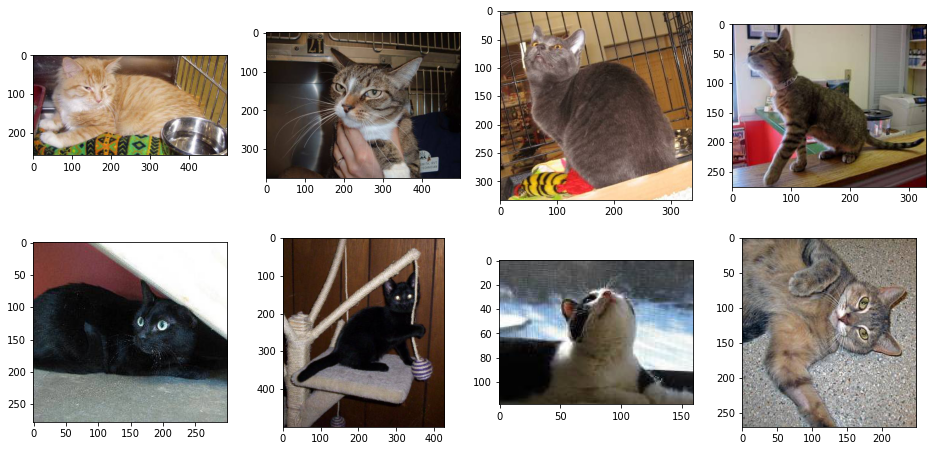

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_cat_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

100
50


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 - 41s - loss: 0.6825 - acc: 0.5485 - val_loss: 0.6653 - val_acc: 0.5440
Epoch 2/20
100/100 - 10s - loss: 0.6319 - acc: 0.6310 - val_loss: 0.6201 - val_acc: 0.6620
Epoch 3/20
100/100 - 10s - loss: 0.5831 - acc: 0.6850 - val_loss: 0.6027 - val_acc: 0.6700
Epoch 4/20
100/100 - 10s - loss: 0.5552 - acc: 0.7080 - val_loss: 0.6012 - val_acc: 0.6610
Epoch 5/20
100/100 - 10s - loss: 0.5340 - acc: 0.7285 - val_loss: 0.5864 - val_acc: 0.6740
Epoch 6/20
100/100 - 10s - loss: 0.5086 - acc: 0.7475 - val_loss: 0.5816 - val_acc: 0.6820
Epoch 7/20
100/100 - 10s - loss: 0.4978 - acc: 0.7510 - val_loss: 0.5657 - val_acc: 0.6940
Epoch 8/20
100/100 - 10s - loss: 0.4681 - acc: 0.7685 - val_loss: 0.5746 - val_acc: 0.6900
Epoch 9/20
100/100 - 10s - loss: 0.4491 - acc: 0.7880 - val_loss: 0.6161 - val_acc: 0.7050
Epoch 10/20
100/100 - 10s - loss: 0.4286 - acc: 0.8110 - val_loss: 0.5632 - val_acc: 0.7060
Epoch 11/20
100/100 - 10s - loss: 0.4030 - acc: 0.8235 - val_loss: 0.5803 - val_acc: 0.70

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

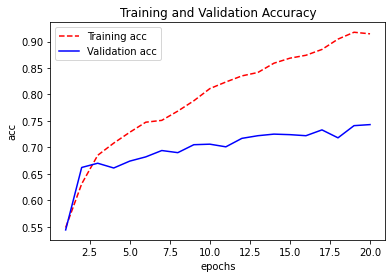

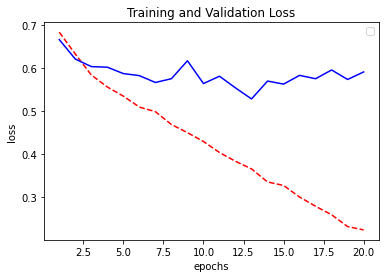

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Accuracy: 0.7429999709129333


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## **6 Data Augmentation y Transfer Learning**
-----

**Deep Learning, Introducción práctica con Keras**

In [13]:
!pip install tensorflow-gpu==2.0.0-alpha0


     |████████████████████████████████| 332.5MB 22kB/s 
     |████████████████████████████████| 419kB 52.7MB/s 
     |████████████████████████████████| 3.0MB 44.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 


**ModelDA: Modelo con Data Augmentation**

In [15]:
import tensorflow as tf

modelDA = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit_generator(
      train_generator,
      steps_per_epoch= steps_per_epoch,
      epochs= 20,
      validation_data= validation_generator,
      validation_steps= validation_steps,
      verbose=2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the fu

In [18]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

100
50
Test Accuracy: 0.7149999737739563


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

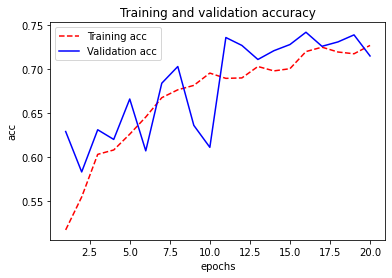

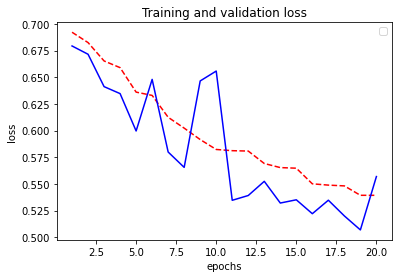

<Figure size 432x288 with 0 Axes>

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt


acc      = historyDA.history[     'acc' ]
val_acc  = historyDA.history[ 'val_acc' ]
loss     = historyDA.history[    'loss' ]
val_loss = historyDA.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

**ModelFE: Modelo con Feature Extraction**

In [20]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')


pre_trained_model.summary()

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [21]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
modelFE.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the fu

In [26]:
test_lost, test_acc= modelFE.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.902999997138977


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

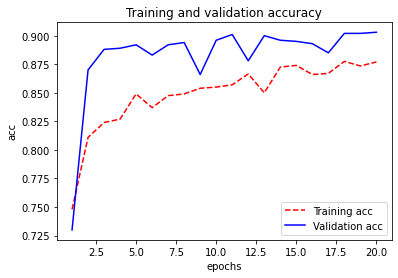

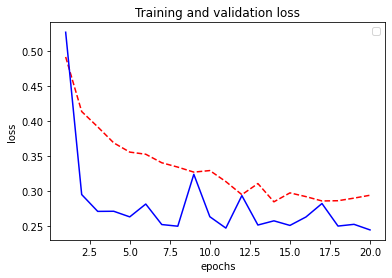

<Figure size 432x288 with 0 Axes>

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt


acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()

**ModelFT : Modelo con Fine Tuning**

In [28]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [29]:
modelFT = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelFT.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [30]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['acc'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the fu

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

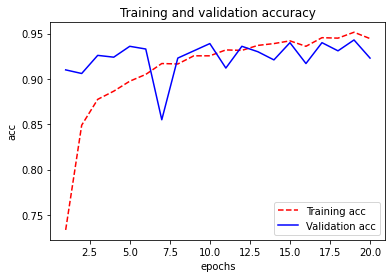

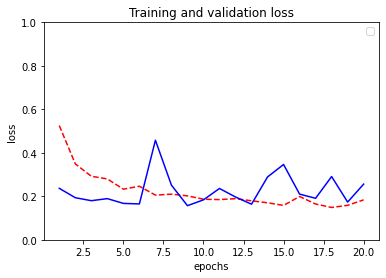

<Figure size 432x288 with 0 Axes>

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()

In [34]:
test_lost, test_acc= modelFT.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.9229999780654907


<Figure size 432x288 with 0 Axes>

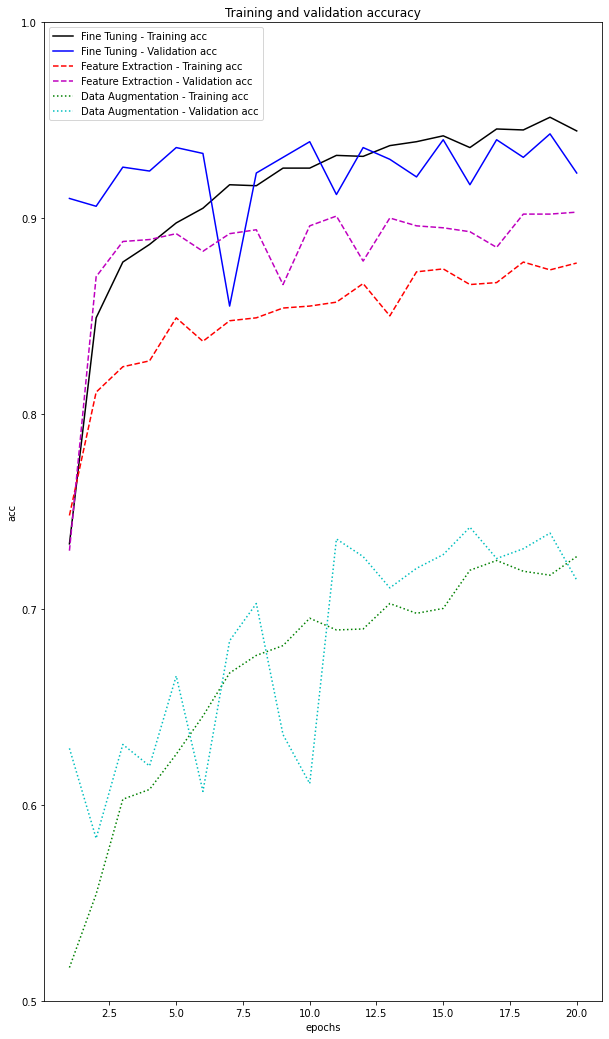

<Figure size 432x288 with 0 Axes>

In [35]:
accDA      = historyDA.history[     'acc' ]
val_accDA  = historyDA.history[ 'val_acc' ]

accFE      = historyFE.history[     'acc' ]
val_accFE  = historyFE.history[ 'val_acc' ]

accFT      = historyFT.history[     'acc' ]
val_accFT  = historyFT.history[ 'val_acc' ]

epochs    = range(1,len(accDA)+1,1) 

plt.figure(figsize=(10,18))

plt.plot  ( epochs,     accFT, 'k', label='Fine Tuning - Training acc '  )
plt.plot  ( epochs, val_accFT,  'b', label='Fine Tuning - Validation acc ')

plt.plot  ( epochs,     accFE, 'r--', label='Feature Extraction - Training acc'  )
plt.plot  ( epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot  ( epochs,     accDA, 'g:', label='Data Augmentation - Training acc'  )
plt.plot  ( epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()